In [132]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

from project_functions import save_categorical_bar_plots

# Suppress warnings
warnings.filterwarnings('ignore')


In [133]:
# Load the dataset from the CSV file
file_path = 'csv_output/Madrid_Sale.csv'
data = pd.read_csv(file_path) 

# Remove the 'geometry' column, as it is not relevant for this analysis
data.drop(columns=['geometry'], inplace=True) 

# Display the dataset dimensions and a sample of the first few rows
print(f"Dataset dimensions: {data.shape}") 
print('---------------------------------------------------------------')
print("First 5 rows of the dataset:\n")
data.columns

Dataset dimensions: (94815, 41)
---------------------------------------------------------------
First 5 rows of the dataset:



Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

In [134]:
# Check the data types of each column in the dataset
data.dtypes

ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                         int64
HASLIFT                            int64
HASAIRCONDITIONING                 int64
AMENITYID                          int64
HASPARKINGSPACE                    int64
ISPARKINGSPACEINCLUDEDINPRICE      int64
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION                int64
HASSOUTHORIENTATION                int64
HASEASTORIENTATION                 int64
HASWESTORIENTATION                 int64
HASBOXROOM                         int64
HASWARDROBE                        int64
HASSWIMMINGPOOL                    int64
HASDOORMAN                         int64
HASGARDEN                          int64
ISDUPLEX                           int64
ISSTUDIO        

In [135]:
# List of columns to be converted from numeric to categorical
num_a_cat = ["PERIOD", "HASTERRACE", "HASLIFT", "HASAIRCONDITIONING", "AMENITYID", "HASPARKINGSPACE",
             "ISPARKINGSPACEINCLUDEDINPRICE", "HASNORTHORIENTATION", "HASSOUTHORIENTATION", "HASEASTORIENTATION",
             "HASWESTORIENTATION", "HASBOXROOM", "HASWARDROBE", "HASSWIMMINGPOOL", "HASDOORMAN", "HASGARDEN", "ISDUPLEX", 
             "ISSTUDIO", "ISINTOPFLOOR", "CADASTRALQUALITYID", "BUILTTYPEID_1", "BUILTTYPEID_2", "BUILTTYPEID_3", 
             "ROOMNUMBER", "BATHNUMBER","FLATLOCATIONID"]

# Convert numeric columns to categorical (object type) using the 'apply' function
data[num_a_cat] = data[num_a_cat].apply(lambda x: x.astype('object'))

# Check the data types of the columns after conversion
data.dtypes

ASSETID                           object
PERIOD                            object
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                        object
BATHNUMBER                        object
HASTERRACE                        object
HASLIFT                           object
HASAIRCONDITIONING                object
AMENITYID                         object
HASPARKINGSPACE                   object
ISPARKINGSPACEINCLUDEDINPRICE     object
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION               object
HASSOUTHORIENTATION               object
HASEASTORIENTATION                object
HASWESTORIENTATION                object
HASBOXROOM                        object
HASWARDROBE                       object
HASSWIMMINGPOOL                   object
HASDOORMAN                        object
HASGARDEN                         object
ISDUPLEX                          object
ISSTUDIO        

In [136]:
# Count missing values for each column and select only those with missing data
missing_data = data.isna().sum()[data.isna().sum() > 0]
missing_data

CONSTRUCTIONYEAR      55873
FLOORCLEAN             3846
FLATLOCATIONID         6387
CADASTRALQUALITYID        1
dtype: int64

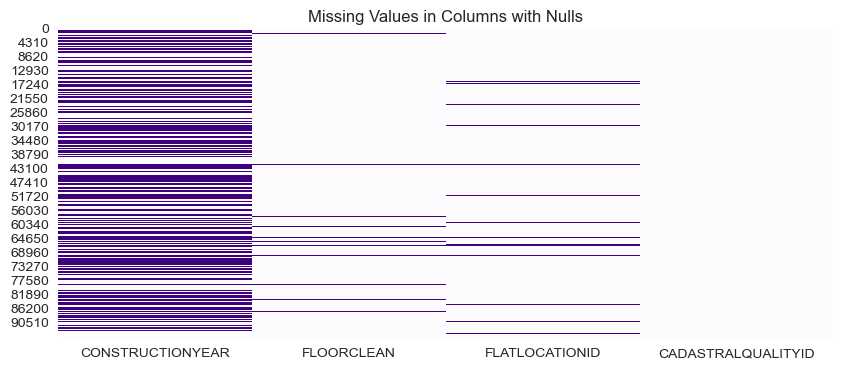

In [137]:
# Select columns with at least one null value
columns_with_nans = data.columns[data.isnull().any()]

# Filter the DataFrame to include only these columns
data_with_nans = data[columns_with_nans]

# Plot the heatmap with only columns that have missing values
plt.figure(figsize=(10, 4))
sns.heatmap(data_with_nans.isnull(), cbar=False, cmap='Purples')

# Add title and show the plot
plt.title("Missing Values in Columns with Nulls")
plt.show()

In [138]:
# Create a copy of the original data to work with
data_constrution_check = data.copy()

# Create a new column with the comparisons between 'CADCONSTRUCTIONYEAR' and 'CONSTRUCTIONYEAR'
data_constrution_check['comparison'] = data_constrution_check.apply(
    lambda row: 'Valores iguales' if row['CADCONSTRUCTIONYEAR'] == row['CONSTRUCTIONYEAR'] 
    else ('Es null' if pd.isna(row['CADCONSTRUCTIONYEAR']) or pd.isna(row['CONSTRUCTIONYEAR']) 
          else 'Distintos Valores'), axis=1
)

# Count the unique values in the 'comparison' column
comparison_counts = data_constrution_check['comparison'].value_counts()

# Display the results
comparison_counts

comparison
Es null              55873
Valores iguales      38464
Distintos Valores      478
Name: count, dtype: int64

In [139]:
# Drop the 'CONSTRUCTIONYEAR' column because the 'CADCONSTRUCTIONYEAR' column 
# contains the same or more accurate information about the construction year.
data.drop(columns=['CONSTRUCTIONYEAR'],inplace=True)

In [140]:
# Find the duplicated rows in the 'ASSETID' column
duplicates = data[data['ASSETID'].duplicated()]

duplicates.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
2783,A5166385142982428764,201803,414000.0,4704.545455,88,2,1,0,1,0,...,82,3.0,0,0,1,2.303359,0.304688,0.910568,-3.679498,40.425870
3340,A9658442428237065374,201803,487000.0,7268.656716,67,2,1,0,1,1,...,13,4.0,0,0,1,0.460878,0.156260,1.289164,-3.709226,40.416691
3341,A1034208215991629606,201803,749000.0,4740.506329,158,0,0,0,1,0,...,12,3.0,0,1,0,0.497874,0.106661,1.329012,-3.709620,40.417139
3343,A4775182175615276542,201803,258000.0,5733.333333,45,1,1,0,1,1,...,15,5.0,0,0,1,0.906391,0.080037,1.539759,-3.710506,40.422927
3345,A16938985986712536769,201803,4407000.0,4929.530201,894,6,7,0,1,0,...,15,4.0,0,0,1,0.715702,0.348940,1.454769,-3.711149,40.413436


In [141]:
# List of ASSETIDs you want to filter
asset_ids = [
    'A9999219692481893574', 'A9998712247880672923', 'A9998114233912501493',
    'A9995962414057013729', 'A9995962414057013729', 'A9994202314028450695'
]

# Filter the rows where the ASSETID is in the list of ASSETIDs
specific_assets = data[data['ASSETID'].isin(asset_ids)]

# Display the rows corresponding to those ASSETIDs, sorted by 'ASSETID' in descending order
specific_assets.head().sort_values(by=['ASSETID'])

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
12177,A9995962414057013729,201812,692000.0,6178.571429,112,1,1,0,1,0,...,18,6.0,1,0,0,0.656706,0.195531,0.522865,-3.698722,40.421053
20572,A9995962414057013729,201812,664000.0,5928.571429,112,1,1,0,1,0,...,18,6.0,1,0,0,0.751896,0.098706,0.503737,-3.698164,40.421813
13321,A9998114233912501493,201812,849000.0,7134.453782,119,2,2,0,1,1,...,3,3.0,0,0,1,0.086812,0.339541,0.745874,-3.702766,40.416578
36635,A9998712247880672923,201812,870000.0,5304.878049,164,2,2,0,0,1,...,10,4.0,0,0,1,0.574298,0.127988,0.406554,-3.698478,40.413387
11584,A9999219692481893574,201803,264000.0,3666.666667,72,2,1,1,0,1,...,7,6.0,0,0,1,4.916850,0.449440,2.404153,-3.662654,40.447742


In [142]:
# Remove duplicated rows in the 'ASSETID' column, keeping only the first occurrence
data = data.drop_duplicates(subset='ASSETID')

# Display the DataFrame dimensions after removing duplicates
print(f"Dataset dimensions: {data.shape}") 

Dataset dimensions: (75804, 40)


In [143]:
# List of ASSETIDs you want to filter
asset_ids = [
    'A9999219692481893574', 'A9998712247880672923', 'A9998114233912501493',
    'A9995962414057013729', 'A9995962414057013729', 'A9994202314028450695'
]

# Filter the rows where the ASSETID is in the list of ASSETIDs
specific_assets = data[data['ASSETID'].isin(asset_ids)]

# Display the rows corresponding to those ASSETIDs, sorted by 'ASSETID' in descending order
specific_assets.head().sort_values(by=['ASSETID'])

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
76496,A9994202314028450695,201812,342000.0,3600.000000,95,3,2,0,1,1,...,478,4.0,0,0,1,5.145646,0.503178,3.385175,-3.728560,40.374391
12177,A9995962414057013729,201812,692000.0,6178.571429,112,1,1,0,1,0,...,18,6.0,1,0,0,0.656706,0.195531,0.522865,-3.698722,40.421053
13321,A9998114233912501493,201812,849000.0,7134.453782,119,2,2,0,1,1,...,3,3.0,0,0,1,0.086812,0.339541,0.745874,-3.702766,40.416578
36635,A9998712247880672923,201812,870000.0,5304.878049,164,2,2,0,0,1,...,10,4.0,0,0,1,0.574298,0.127988,0.406554,-3.698478,40.413387
11584,A9999219692481893574,201803,264000.0,3666.666667,72,2,1,1,0,1,...,7,6.0,0,0,1,4.916850,0.449440,2.404153,-3.662654,40.447742


In [144]:
numerical_features = data.select_dtypes(include=['number']).drop(columns = ['LATITUDE','LONGITUDE']).columns
categorical_features = data.select_dtypes(exclude=['number']).drop(columns = ['ASSETID']).columns

print(f'Numercial features: {numerical_features}')
print('----------------------------------------------------------')
print(f'Categorical features: {categorical_features}')

Numercial features: Index(['PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'PARKINGSPACEPRICE',
       'FLOORCLEAN', 'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR',
       'CADDWELLINGCOUNT', 'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA'],
      dtype='object')
----------------------------------------------------------
Categorical features: Index(['PERIOD', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR', 'FLATLOCATIONID',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2',
       'BUILTTYPEID_3'],
      dtype='object')


In [145]:
data.describe()

,PRICE,UNITPRICE,CONSTRUCTEDAREA,PARKINGSPACEPRICE,FLOORCLEAN,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,7.580400e+04,75804.000000,75804.000000,75804.000000,72690.000000,75804.000000,75804.000000,75804.000000,75804.000000,75804.000000,75804.000000,75804.000000,75804.000000
mean,3.895441e+05,3641.582370,100.250646,666.145177,2.745178,1965.466400,6.360601,38.716150,4.482177,0.475372,2.681288,-3.686301,40.420646
std,4.130975e+05,1712.959849,66.469512,7747.943705,2.253326,28.921797,2.842914,53.319746,3.060601,1.566674,2.656468,0.039070,0.036031
min,2.100000e+04,805.309735,21.000000,1.000000,-1.000000,1623.000000,0.000000,1.000000,0.015374,0.001416,0.001435,-3.832534,36.756391
25%,1.570000e+05,2206.652893,62.000000,1.000000,1.000000,1955.000000,5.000000,12.000000,2.403719,0.212755,1.040496,-3.708307,40.396508
50%,2.570000e+05,3448.275862,82.000000,1.000000,2.000000,1967.000000,6.000000,21.000000,4.114302,0.330021,1.962104,-3.693971,40.423030
75%,4.570000e+05,4734.042553,115.000000,1.000000,4.000000,1983.000000,8.000000,39.000000,6.219482,0.519193,3.854188,-3.666152,40.441251
max,8.133000e+06,9997.560976,985.000000,925001.000000,11.000000,2018.000000,26.000000,1499.000000,415.752584,399.477366,412.803688,-2.753303,40.520637


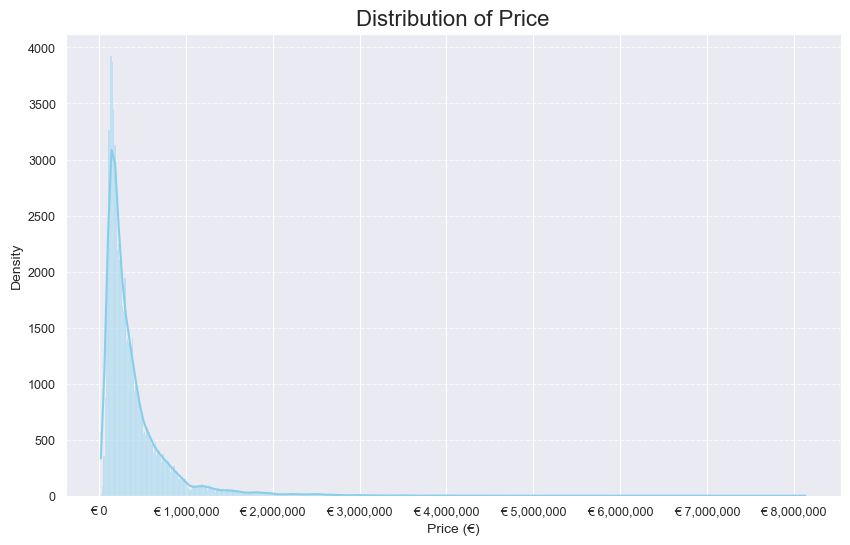

In [146]:
# Create a distribution plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['PRICE'], kde=True, color='skyblue')

# Format the x-axis labels with the € symbol
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('€ {x:,.0f}'))

# Customize title and axis labels
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price (€)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.savefig('plots/price_distribution.png', format = 'png', dpi=300) # Save plot
plt.show()

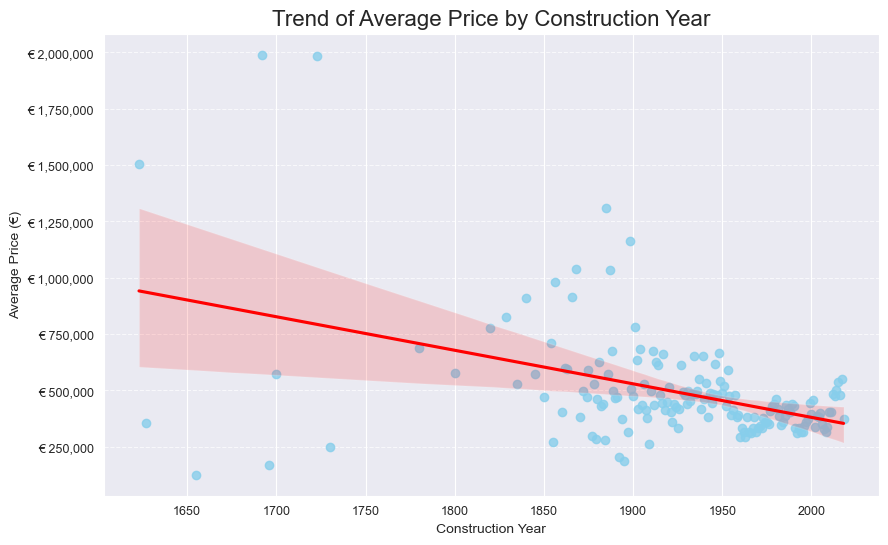

In [147]:
# Create an average plot price trend

# Group by construction year and calculate the mean price
avg_price_year = data.groupby('CADCONSTRUCTIONYEAR')['PRICE'].mean().reset_index()

# Format the x-axis labels with the € symbol
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('€ {y:,.0f}'))

# Plot the average price trend with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='CADCONSTRUCTIONYEAR', y='PRICE', data=avg_price_year, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

# Format the y-axis labels with the € symbol
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('€ {x:,.0f}'))

# Customize plot
plt.title('Trend of Average Price by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=10)
plt.ylabel('Average Price (€)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('plots/average_price_by_construction_year.png', format = 'png', dpi=300)

# Show plot
plt.show()

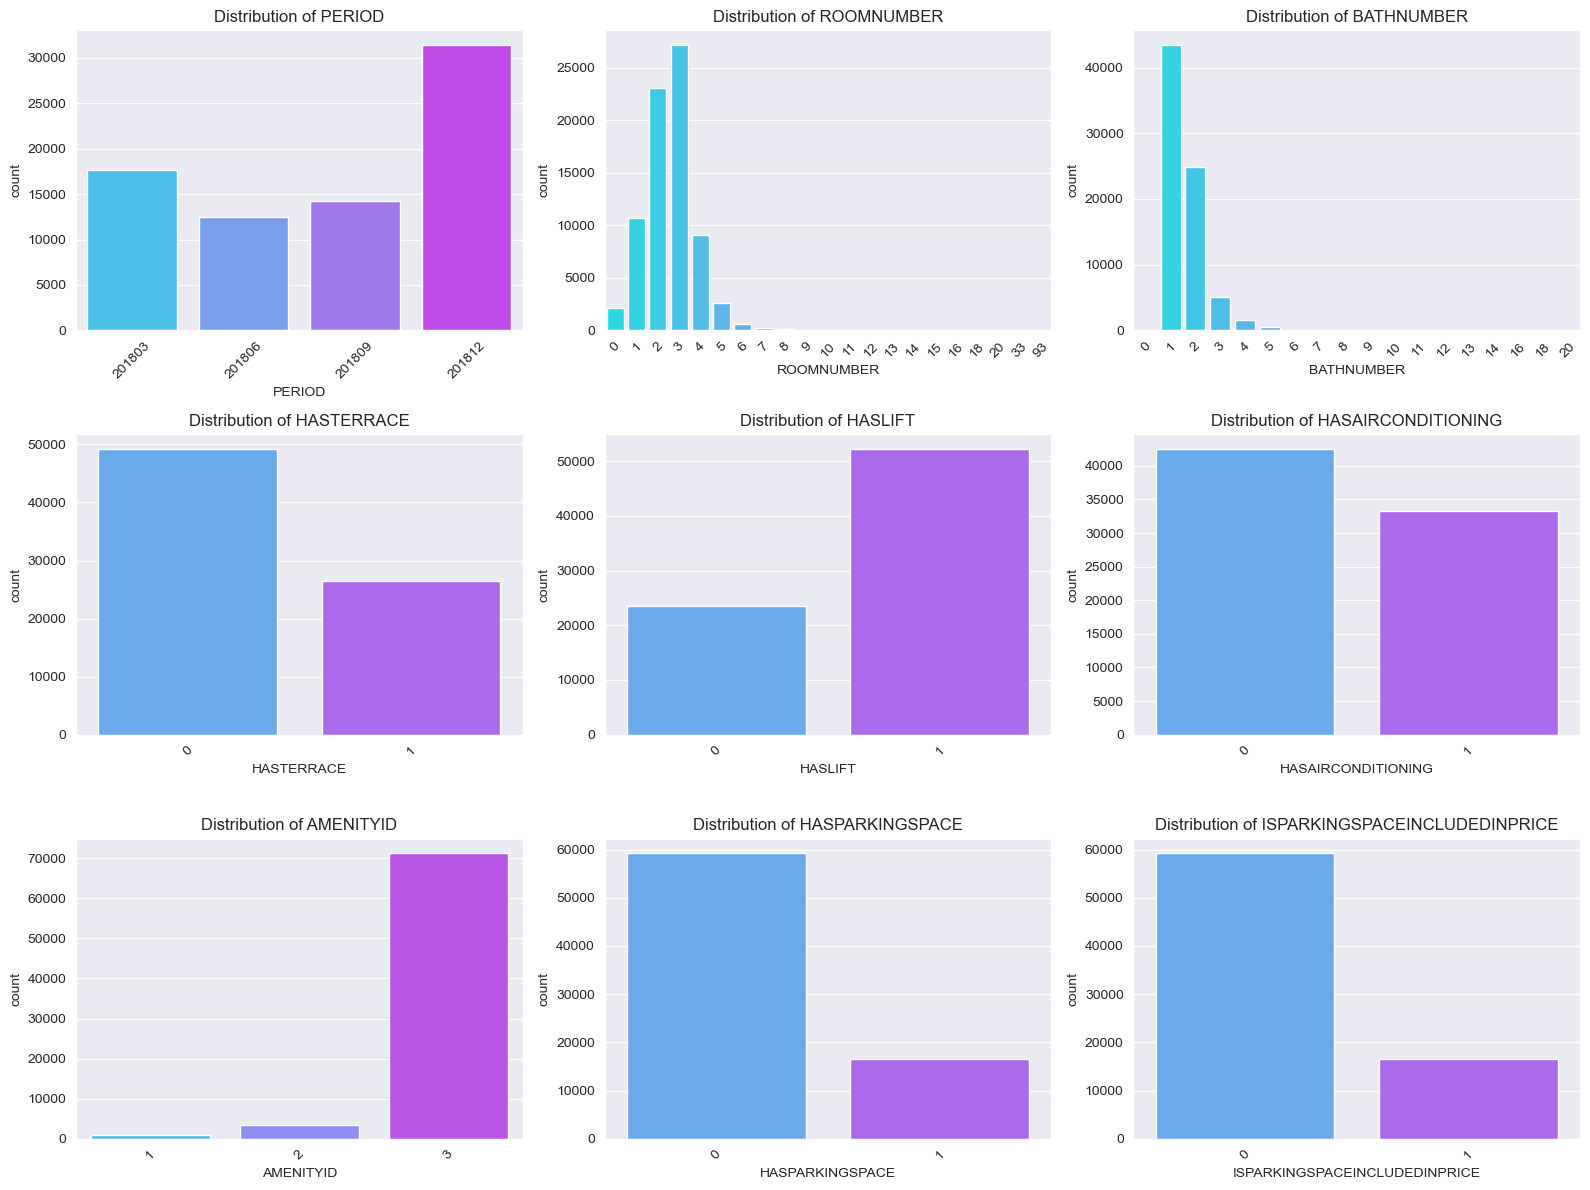

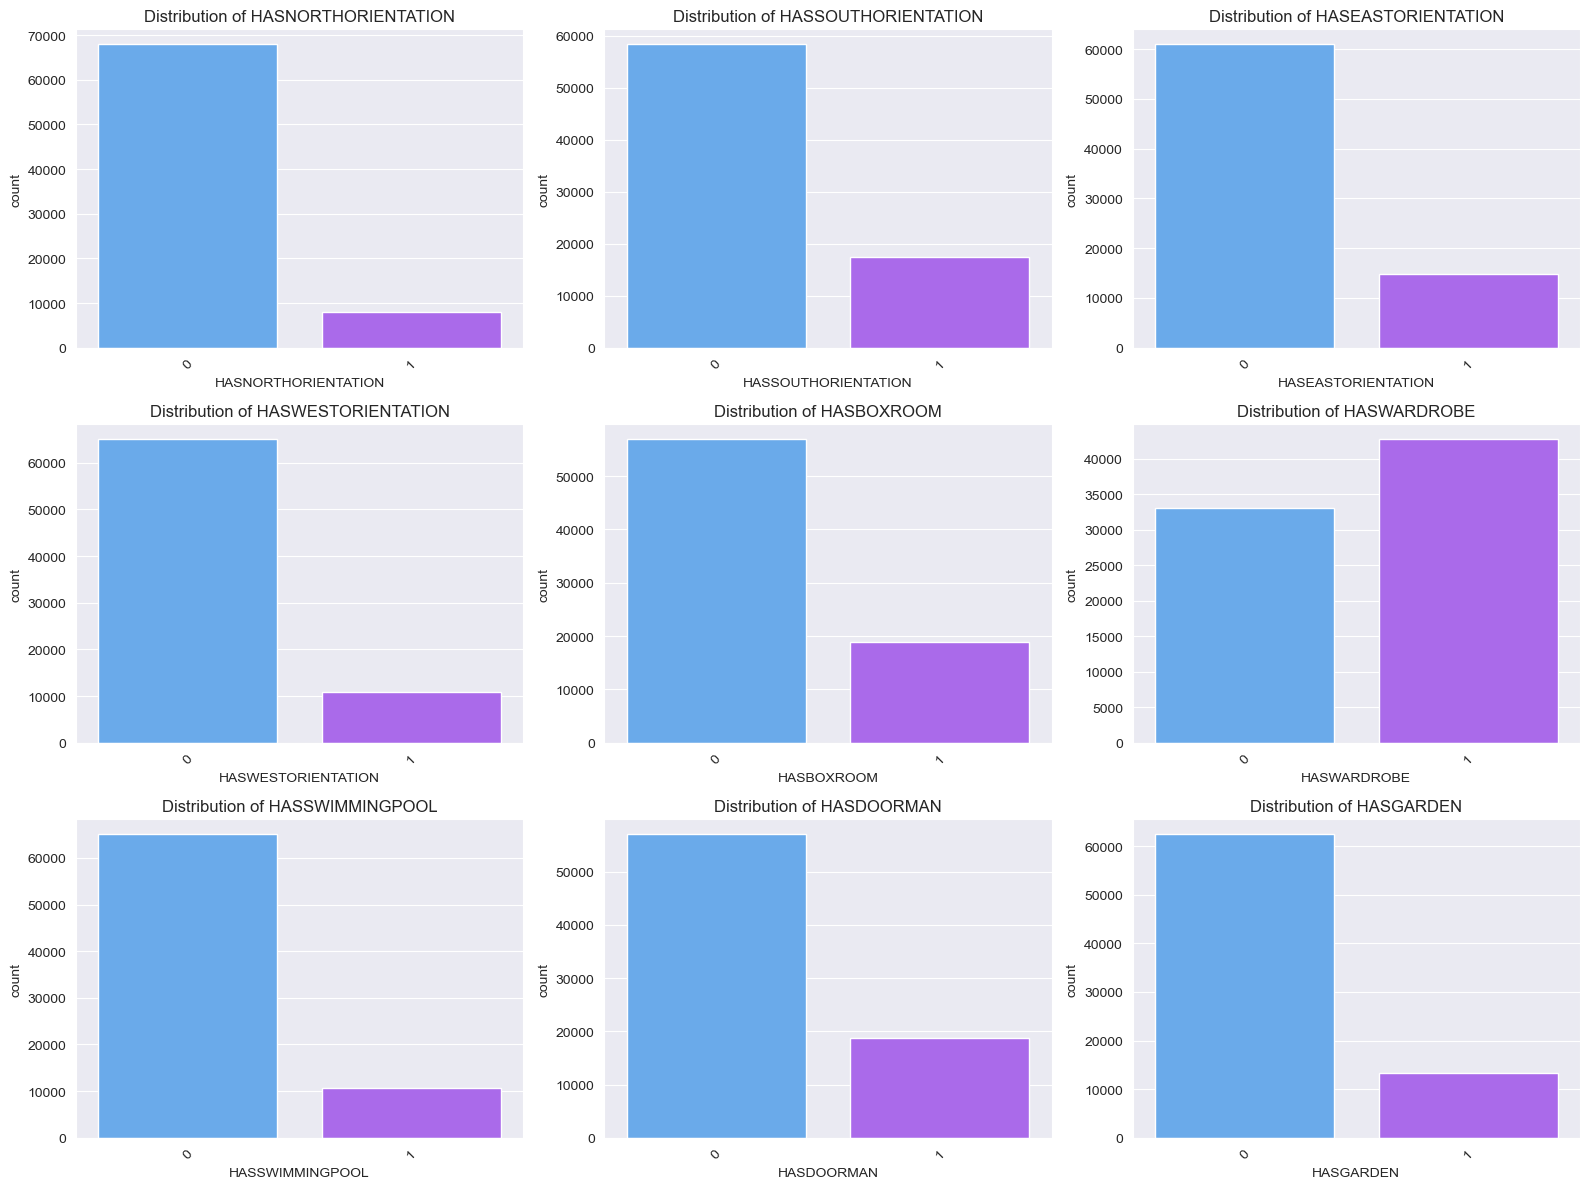

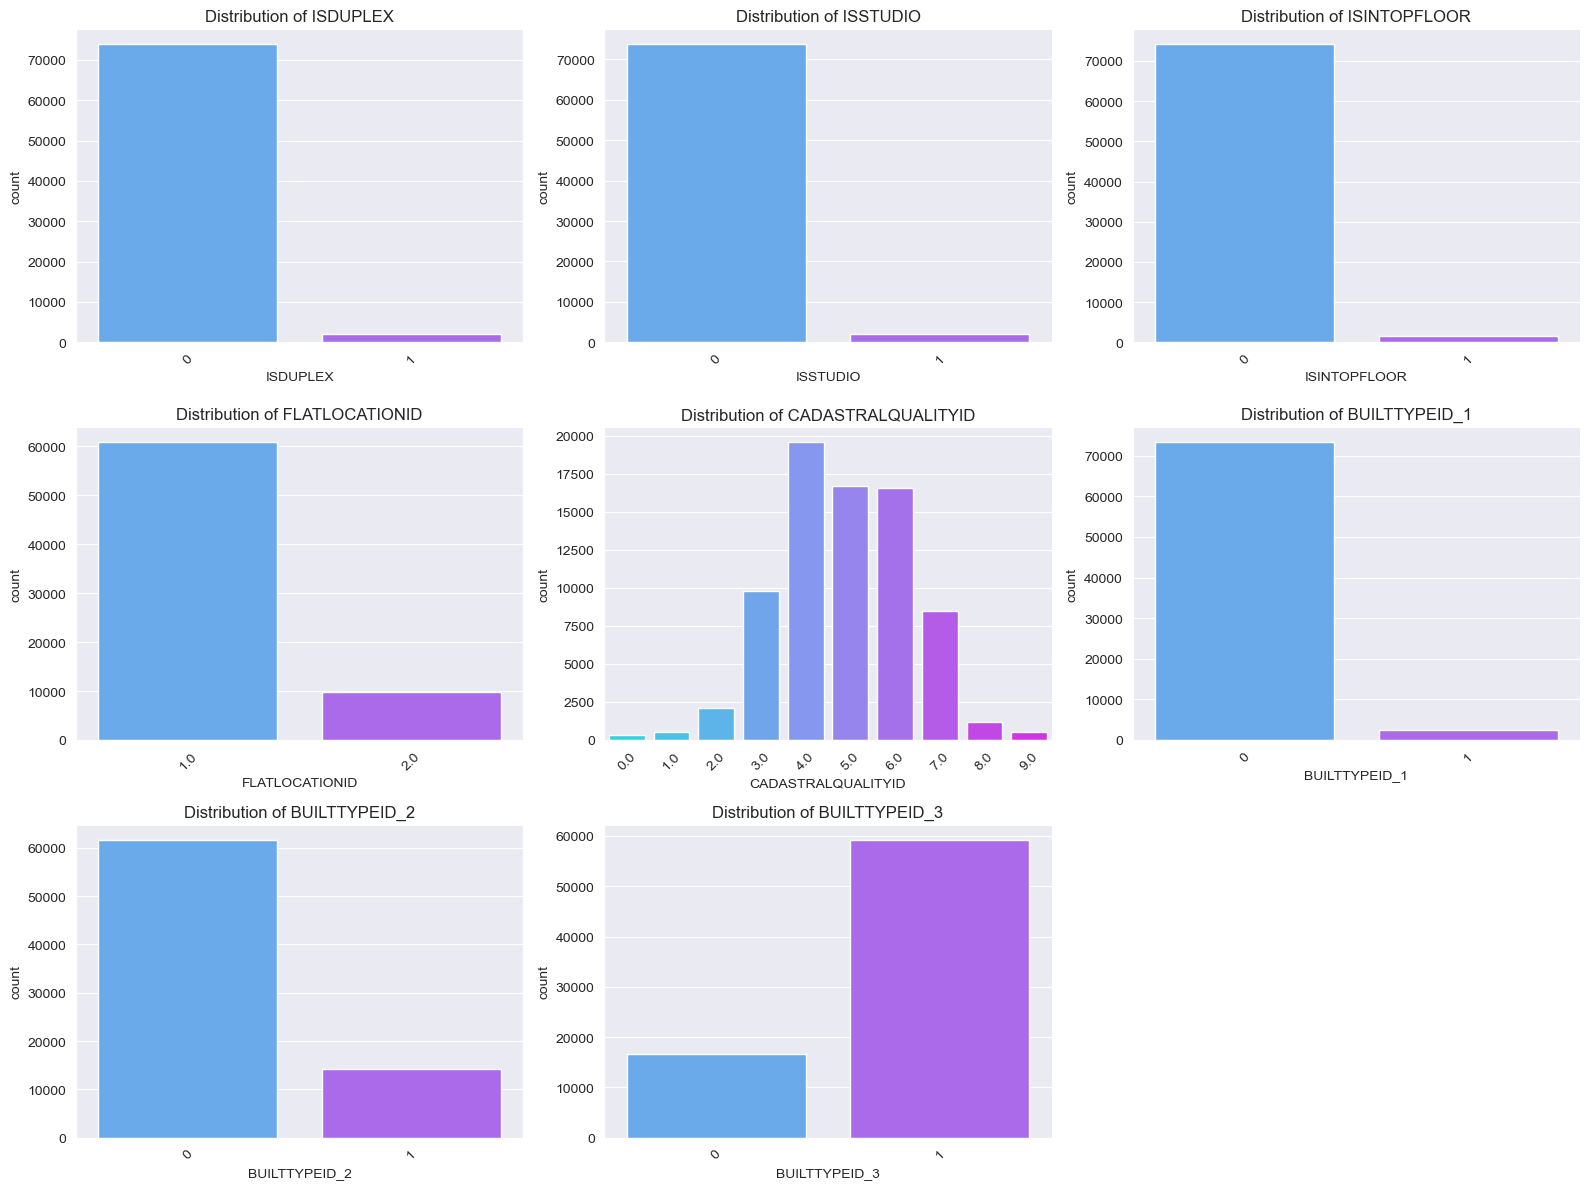

In [148]:
num_vars = len(categorical_features)
graphs_per_fig = 9  # Máximo de gráficos por figura

for start in range(0, num_vars, graphs_per_fig):
    end = start + graphs_per_fig
    plt.figure(figsize=(16, 12))
    for i, var in enumerate(categorical_features[start:end], 1):
        plt.subplot(3, 3, i)
        sns.countplot(x=var, data=data, palette='cool')
        plt.title(f'Distribution of {var}')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [149]:
# Call the function to generate and save bar plots for the specified categorical features as PNG files
saved_files = save_categorical_bar_plots(data, categorical_features)

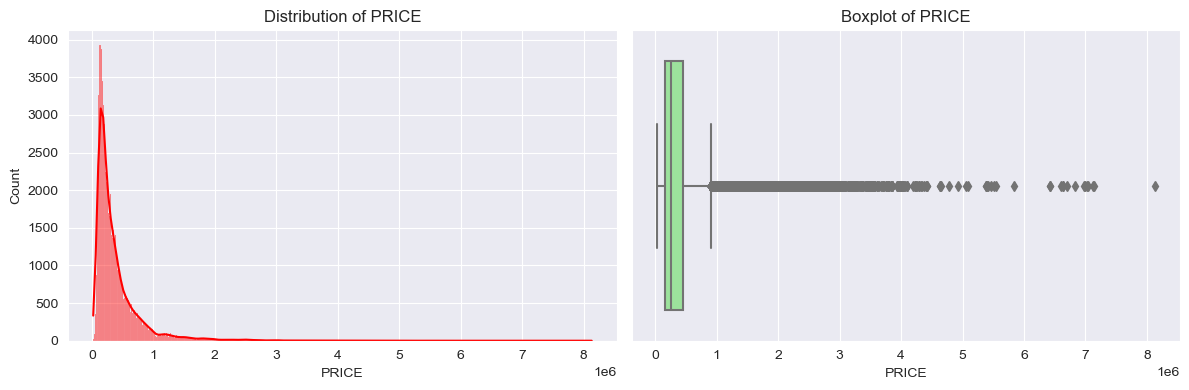

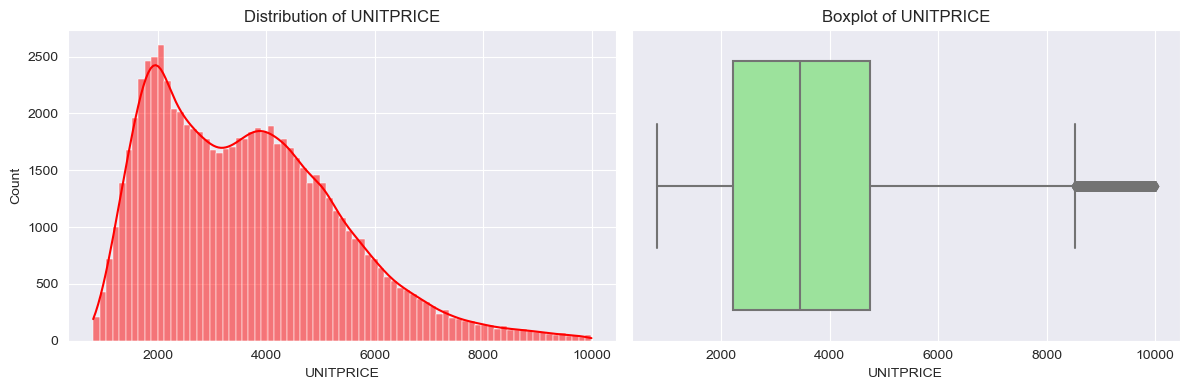

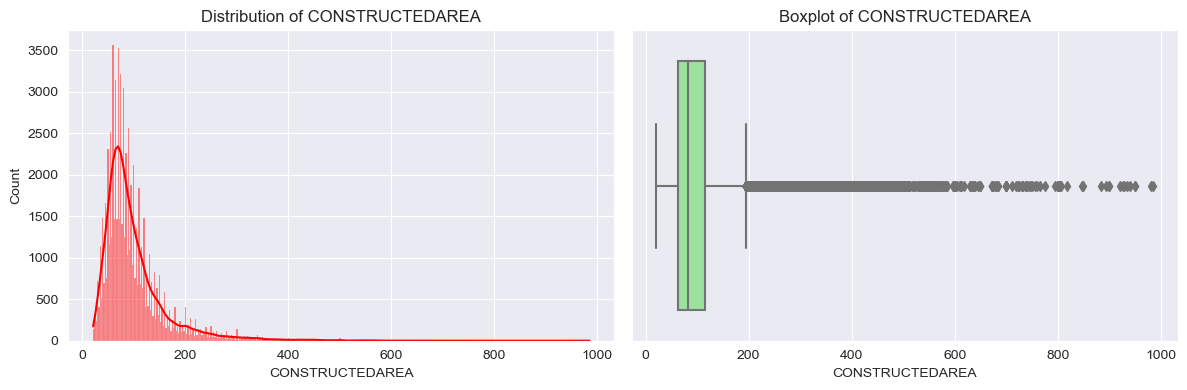

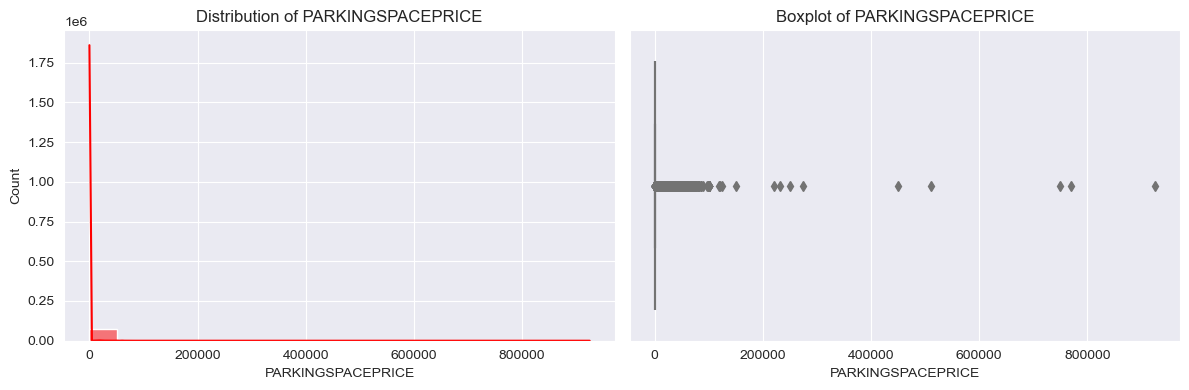

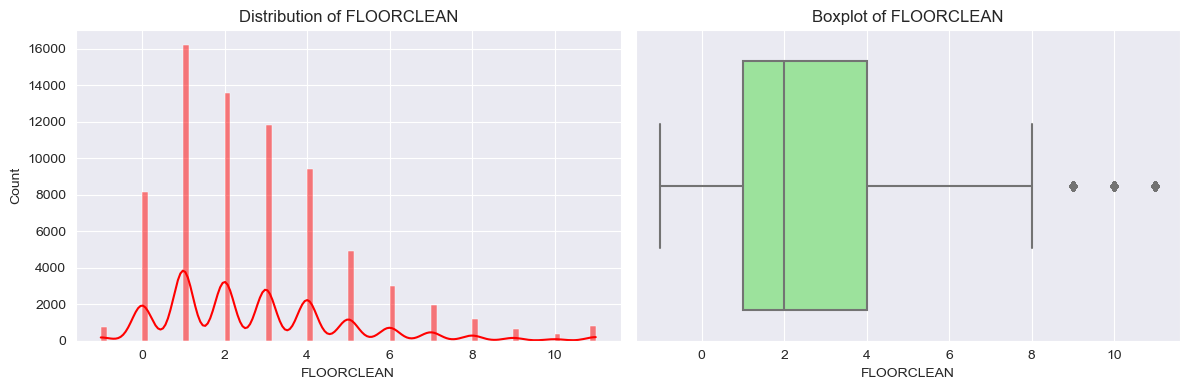

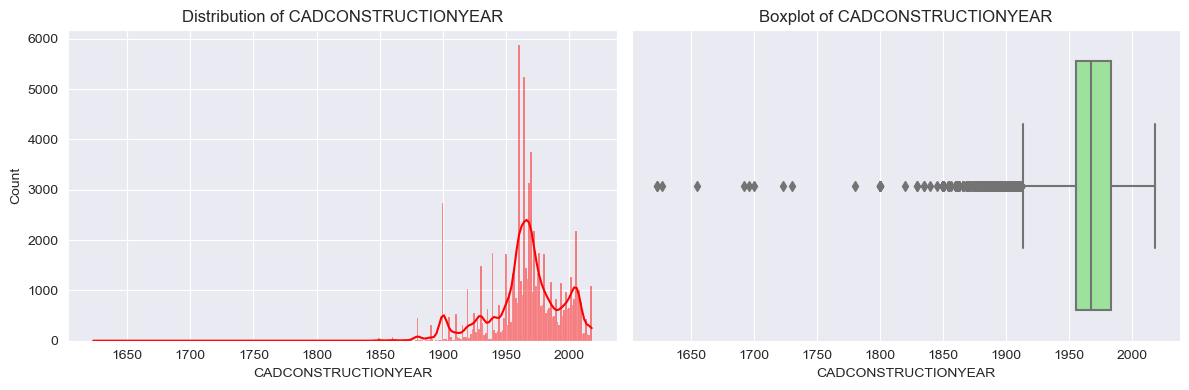

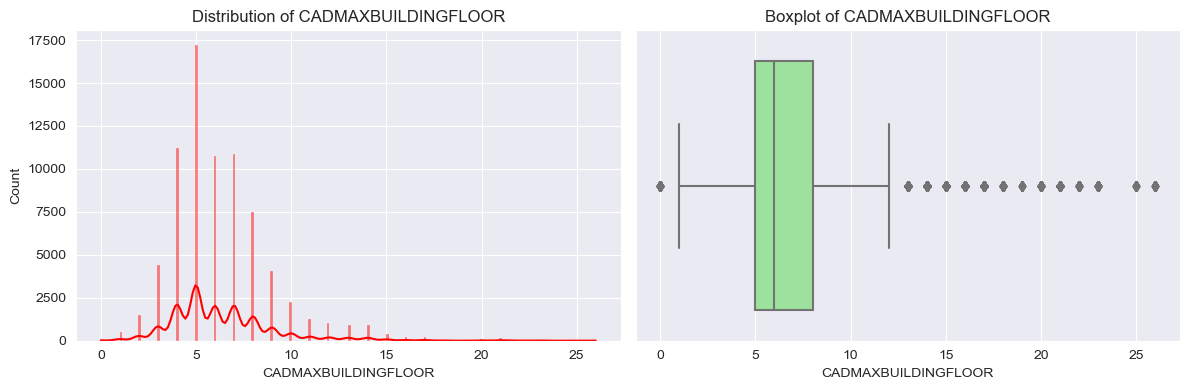

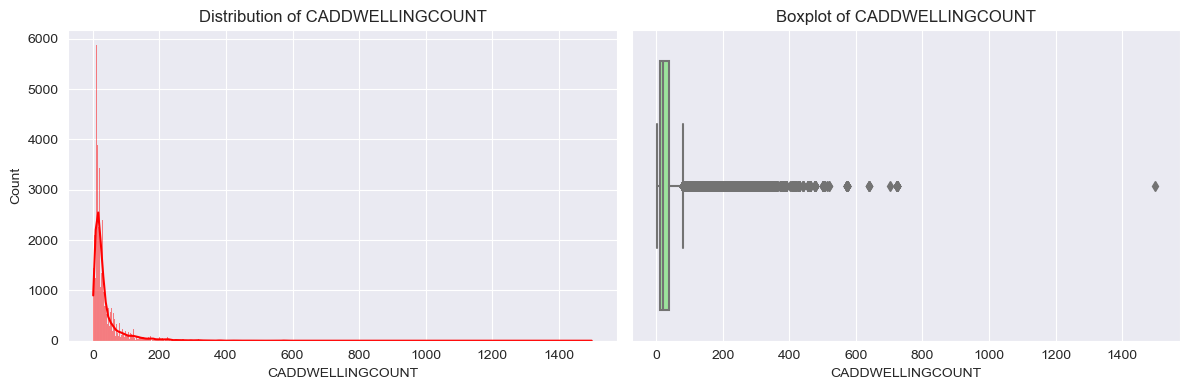

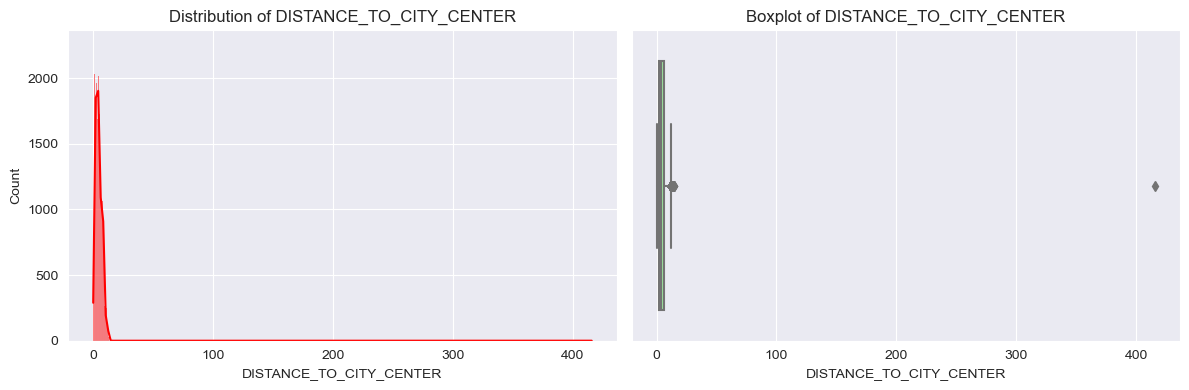

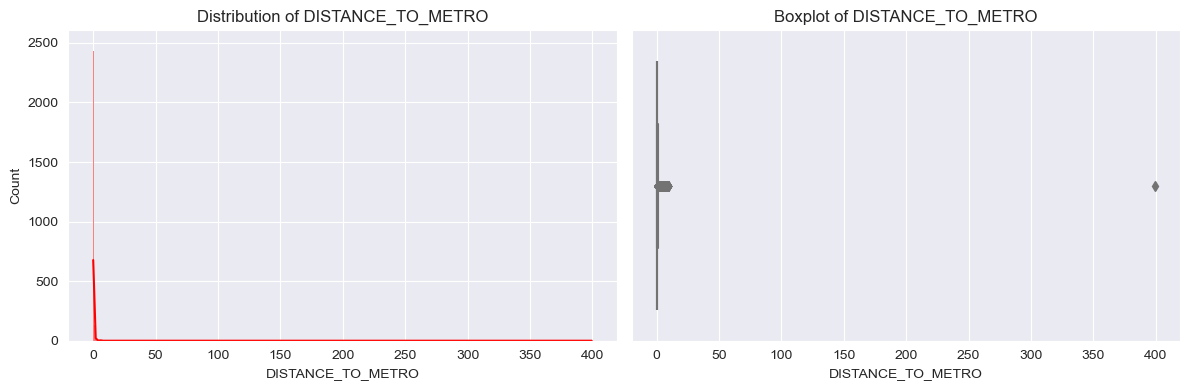

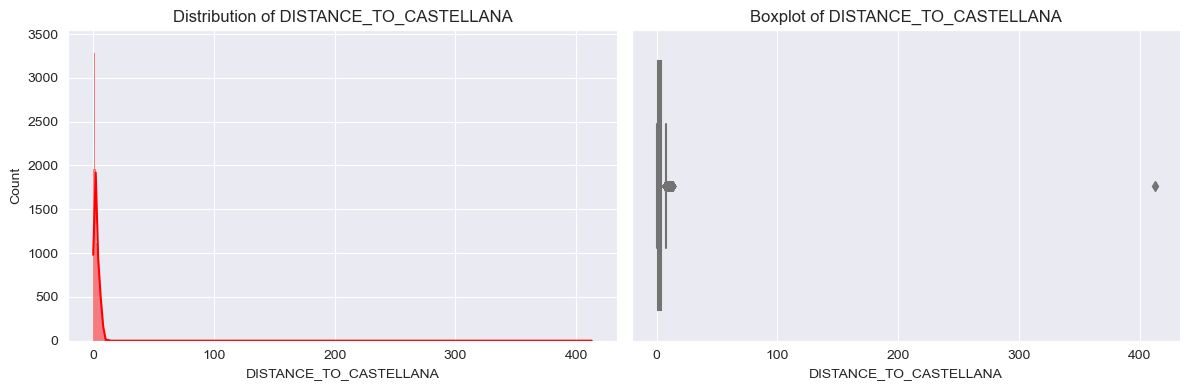

In [150]:
# Descriptive Analysis
for var in numerical_features:

    # Visualizing the distribution
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, color='red')
    plt.title(f'Distribution of {var}') 

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot of {var}')

    plt.tight_layout()
plt.show()

In [151]:
# Descriptive statistics for numerical variables using the describe() function in Python
descriptive_stats_num = data[numerical_features].describe().transpose()

# Adding more descriptive statistics to the previous ones
for num in numerical_features:
    descriptive_stats_num.loc[num, "Skewness"] = data[num].skew()
    descriptive_stats_num.loc[num, "Kurtosis"] = data[num].kurtosis()
    descriptive_stats_num.loc[num, "Range"] = np.ptp(data[num].dropna().values)

descriptive_stats_num

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Range
PRICE,75804.0,389544.087383,413097.493988,21000.000000,157000.000000,257000.000000,457000.000000,8.133000e+06,4.069826,29.296932,8.112000e+06
UNITPRICE,75804.0,3641.582370,1712.959849,805.309735,2206.652893,3448.275862,4734.042553,9.997561e+03,0.733740,0.243853,9.192251e+03
CONSTRUCTEDAREA,75804.0,100.250646,66.469512,21.000000,62.000000,82.000000,115.000000,9.850000e+02,3.270475,18.707879,9.640000e+02
PARKINGSPACEPRICE,75804.0,666.145177,7747.943705,1.000000,1.000000,1.000000,1.000000,9.250010e+05,57.941955,5578.676243,9.250000e+05
FLOORCLEAN,72690.0,2.745178,2.253326,-1.000000,1.000000,2.000000,4.000000,1.100000e+01,1.154505,1.595857,1.200000e+01
CADCONSTRUCTIONYEAR,75804.0,1965.466400,28.921797,1623.000000,1955.000000,1967.000000,1983.000000,2.018000e+03,-0.806246,1.975008,3.950000e+02
CADMAXBUILDINGFLOOR,75804.0,6.360601,2.842914,0.000000,5.000000,6.000000,8.000000,2.600000e+01,1.760902,5.779136,2.600000e+01
CADDWELLINGCOUNT,75804.0,38.716150,53.319746,1.000000,12.000000,21.000000,39.000000,1.499000e+03,4.290636,32.163430,1.498000e+03
DISTANCE_TO_CITY_CENTER,75804.0,4.482177,3.060601,0.015374,2.403719,4.114302,6.219482,4.157526e+02,32.403678,4300.251911,4.157372e+02
DISTANCE_TO_METRO,75804.0,0.475372,1.566674,0.001416,0.212755,0.330021,0.519193,3.994774e+02,218.264605,55503.361814,3.994760e+02


In [231]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = os.getcwd()
file = os.path.join(file_path, 'cartographic_data\Madrid\Distritos.shp')
gdf = gpd.read_file(file).drop_duplicates()
gdf

,Shape_Leng,COD_DIS,COD_DIS_TX,NOMBRE,DISTRI_MAY,DISTRI_MT,geometry
0,0.0,1,01,Centro,CENTRO,CENTRO,"POLYGON ((441184.784 4473200.78, 441181.244 44..."
1,0.0,2,02,Arganzuela,ARGANZUELA,ARGANZUELA,"POLYGON ((440272.919 4472969.567, 440350.318 4..."
2,0.0,3,03,Retiro,RETIRO,RETIRO,"POLYGON ((443652.149 4473312.6, 443560.739 447..."
3,0.0,4,04,Salamanca,SALAMANCA,SALAMANCA,"POLYGON ((444075.178 4476611.827, 444057.808 4..."
4,0.0,5,05,ChamartÃ­n,CHAMARTIN,CHAMARTÃN,"POLYGON ((442904.114 4481525.212, 442901.02 44..."
5,0.0,6,06,TetuÃ¡n,TETUAN,TETUÃN,"POLYGON ((440863.995 4480662.221, 440875.945 4..."
6,0.0,7,07,ChamberÃ­,CHAMBERI,CHAMBERÃ,"POLYGON ((441380.014 4477514.037, 441330.993 4..."
7,0.0,8,08,Fuencarral - El Pardo,FUENCARRAL - EL PARDO,FUENCARRAL - EL PARDO,"POLYGON ((445503.158 4498783.075, 445674.188 4..."
8,0.0,9,09,Moncloa - Aravaca,MONCLOA - ARAVACA,MONCLOA - ARAVACA,"POLYGON ((432093.685 4480171.575, 432166.365 4..."
9,0.0,10,10,Latina,LATINA,LATINA,"POLYGON ((438689.611 4473668.522, 438753.889 4..."


<Axes: >

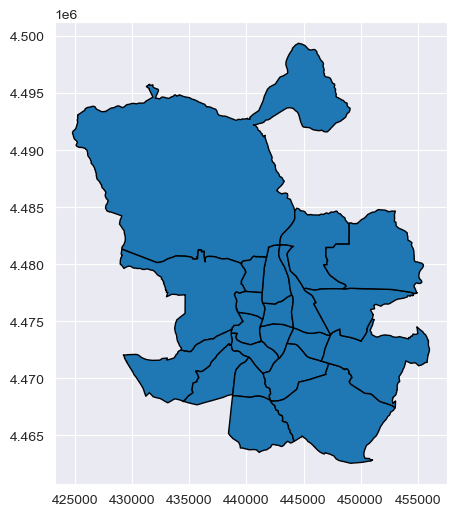

In [232]:
gdf.plot(edgecolor='black', figsize=(10, 6))